# Evaluation 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    mean_absolute_error, 
    mean_squared_error,
    confusion_matrix
)

# Function to evaluate the model and print metrics
def evaluate_model(model_name, model, test_generator):
    # Reset the generator to start from the beginning
    test_generator.reset()  
    
    # Get predictions
    y_pred_prob = model.predict(test_generator)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Binarize predictions
    y_true = test_generator.classes  # True labels

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    auc = roc_auc_score(y_true, y_pred_prob)

    # Calculate specificity
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

    # Print metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Square Error: {rmse:.4f}")
    print(f"AUC Score: {auc:.4f}")
    print(f"Specificity: {specificity:.4f}\n")

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.savefig(f'Confusion_{model_name}.png', format='png', dpi=600, bbox_inches="tight")
    plt.show()

# B-400x Datset

In [50]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/kaggle/working/Final_DNBCD_Model.h5'
model = load_model(model_path)

# Test on B-100x

In [51]:
import os
import shutil
import random

# Set the base path
base_dir = '/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'
output_dir = 'split_100x_dataset'

# Create output directories
os.makedirs(os.path.join(output_dir, 'train', 'benign'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train', 'malignant'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'validation', 'benign'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'validation', 'malignant'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test', 'benign'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test', 'malignant'), exist_ok=True)

# Function to collect images from the nested 100X folders
def collect_images(base_class_dir):
    images = []
    for root, dirs, files in os.walk(base_class_dir):
        if '100X' in root:  # Check if the current directory is a 100X folder
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add image files
                    images.append(os.path.join(root, file))
    return images

# Collect images from benign and malignant classes
benign_images = collect_images(os.path.join(base_dir, 'benign'))
malignant_images = collect_images(os.path.join(base_dir, 'malignant'))

# Function to split the dataset
def split_dataset(images, train_ratio, validation_ratio):
    random.shuffle(images)  # Shuffle images
    total_images = len(images)
    train_end = int(total_images * train_ratio)
    validation_end = train_end + int(total_images * validation_ratio)

    train_images = images[:train_end]
    validation_images = images[train_end:validation_end]
    test_images = images[validation_end:]

    return train_images, validation_images, test_images

# Split the benign and malignant datasets
benign_train, benign_val, benign_test = split_dataset(benign_images, 0.7, 0.1)
malignant_train, malignant_val, malignant_test = split_dataset(malignant_images, 0.7, 0.1)

# Move files to the respective directories
for img in benign_train:
    shutil.copy(img, os.path.join(output_dir, 'train', 'benign', os.path.basename(img)))
for img in benign_val:
    shutil.copy(img, os.path.join(output_dir, 'validation', 'benign', os.path.basename(img)))
for img in benign_test:
    shutil.copy(img, os.path.join(output_dir, 'test', 'benign', os.path.basename(img)))

for img in malignant_train:
    shutil.copy(img, os.path.join(output_dir, 'train', 'malignant', os.path.basename(img)))
for img in malignant_val:
    shutil.copy(img, os.path.join(output_dir, 'validation', 'malignant', os.path.basename(img)))
for img in malignant_test:
    shutil.copy(img, os.path.join(output_dir, 'test', 'malignant', os.path.basename(img)))

print("Dataset split completed.")

Dataset split completed.


Found 2023 images belonging to 2 classes.
Found 1017 images belonging to 2 classes.
Found 554 images belonging to 2 classes.
Training samples: 2023
Validation samples: 1017
Test samples: 554


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 843ms/step
Model: DNBCD
Accuracy: 0.8032
Precision: 0.8801
Recall: 0.8325
F1 Score: 0.8556
Mean Absolute Error: 0.1968
Root Mean Square Error: 0.4436
AUC Score: 0.8543
Specificity: 0.7349



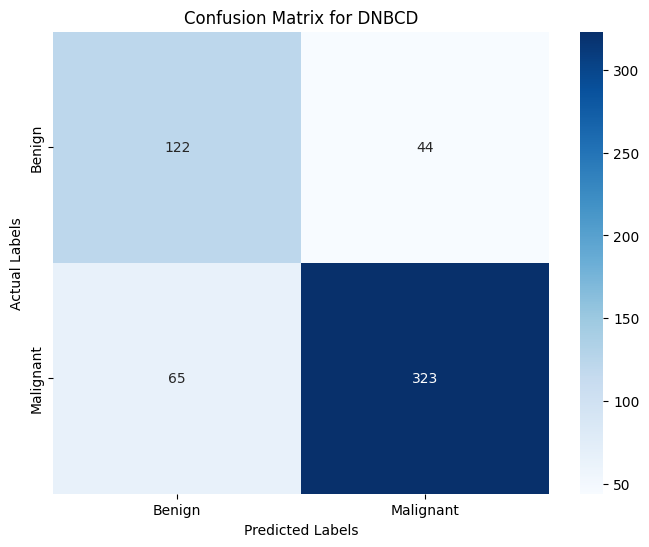

In [52]:
import os
import numpy as np
import cv2  # OpenCV for general use (not CLAHE)
import tensorflow as tf
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from sklearn.utils.class_weight import compute_class_weight

# Define paths
train_dir = "/kaggle/working/split_100x_dataset/train"
val_dir = "/kaggle/working/split_100x_dataset/test"
test_dir = "/kaggle/working/split_100x_dataset/validation"

# Parameters
input_shape = (128, 128, 3)
batch_size = 32
epochs = 20

# Create data generators for binary classification
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=False
)

# Print the number of samples in each split
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")

evaluate_model(model_name,model, test_generator)

# B-100x Dataset

In [39]:
import os
import numpy as np
import cv2  # OpenCV for general use (not CLAHE)
import tensorflow as tf
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from sklearn.utils.class_weight import compute_class_weight

# Define paths
train_dir = "/kaggle/working/split_100x_dataset/train"
val_dir = "/kaggle/working/split_100x_dataset/test"
test_dir = "/kaggle/working/split_100x_dataset/validation"

# Parameters
input_shape = (128, 128, 3)
batch_size = 32
epochs = 20

# Create data generators for binary classification
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=False
)

# Print the number of samples in each split
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")

# Compute class weights
train_labels = train_generator.classes  # Class indices for training samples
class_names = list(train_generator.class_indices.keys())
class_weights = compute_class_weight(
    class_weight='balanced',  # Balance classes based on their frequency
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights))

# Print the calculated class weights
print("Class Weights:", class_weights)

# Load pre-trained DenseNet121 model + higher-level layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the complete model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    class_weight=class_weights  # Use calculated class weights
)

# Unfreeze the base model for fine-tuning
base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])  # Reduce learning rate for fine-tuning

# Fine-tune the model with class weights
history_fine = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    class_weight=class_weights
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print('Loss:', loss)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Found 1902 images belonging to 2 classes.
Found 758 images belonging to 2 classes.
Found 391 images belonging to 2 classes.
Training samples: 1902
Validation samples: 758
Test samples: 391
Class Weights: {0: 1.6201022146507666, 1: 0.7231939163498099}
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 79s 946ms/step - accuracy: 0.5522 - loss: 0.8565 - val_accuracy: 0.7929 - val_loss: 0.5525
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 553ms/step - accuracy: 0.6486 - loss: 0.6652 - val_accuracy: 0.7823 - val_loss: 0.4927
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 551ms/step - accuracy: 0.7063 - loss: 0.5578 - val_accuracy: 0.7784 - val_loss: 0.5138
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 551ms/step - accuracy: 0.7384 - loss: 0.5306 - val_accuracy: 0.8153 - val_loss: 0.4410
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 551ms/step - accuracy: 0.7823 - loss: 0.4987 - val_accuracy: 0.8325 - val_loss: 0.4225
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 550ms/step - accuracy: 0.8120 - loss: 0.4486 - val_accuracy: 0.8285 - val_loss: 0.4085
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 551ms/step - accuracy: 0.8003 - loss: 0.4579 - val_accuracy: 0.8298 - val_loss: 0.3972
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 547ms/step - accuracy: 0.8034 - loss: 0.4389 - val_accuracy: 0.775

I0000 00:00:1741499514.538658     121 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_545', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_544', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_26', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_20', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_464', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_subtract_fusion_5', 20 bytes spill stores, 20 bytes spill loads



60/60 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.6756 - loss: 0.8179 - val_accuracy: 0.7150 - val_loss: 0.7673
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 559ms/step - accuracy: 0.8868 - loss: 0.2446 - val_accuracy: 0.7111 - val_loss: 0.9987
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 560ms/step - accuracy: 0.9353 - loss: 0.1781 - val_accuracy: 0.7230 - val_loss: 1.0895
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 559ms/step - accuracy: 0.9446 - loss: 0.1599 - val_accuracy: 0.7586 - val_loss: 0.8473
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 564ms/step - accuracy: 0.9690 - loss: 0.1054 - val_accuracy: 0.8259 - val_loss: 0.5028
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 561ms/step - accuracy: 0.9656 - loss: 0.0944 - val_accuracy: 0.9327 - val_loss: 0.1538
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 557ms/step - accuracy: 0.9683 - loss: 0.0811 - val_accuracy: 0.9578 - val_loss: 0.0952
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 557ms/step - accuracy: 0.9649 - loss: 0.0892 - val_accuracy: 0.9868 

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 804ms/step
Model: DNBCD
Accuracy: 0.9795
Precision: 0.9713
Recall: 1.0000
F1 Score: 0.9855
Mean Absolute Error: 0.0205
Root Mean Square Error: 0.1430
AUC Score: 0.9997
Specificity: 0.9333



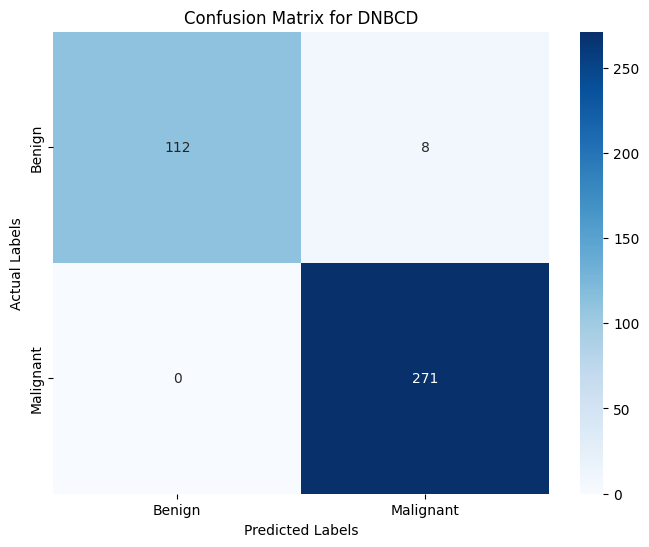

In [40]:
model_name= "DNBCD"
evaluate_model(model_name,model, test_generator)

# Test on B-400x

Found 1273 images belonging to 2 classes.
Found 182 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Training samples: 1273
Validation samples: 182
Test samples: 365
 3/12 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step
Model: DNBCD
Accuracy: 0.7644
Precision: 0.7539
Recall: 0.9676
F1 Score: 0.8475
Mean Absolute Error: 0.2356
Root Mean Square Error: 0.4854
AUC Score: 0.8547
Specificity: 0.3390



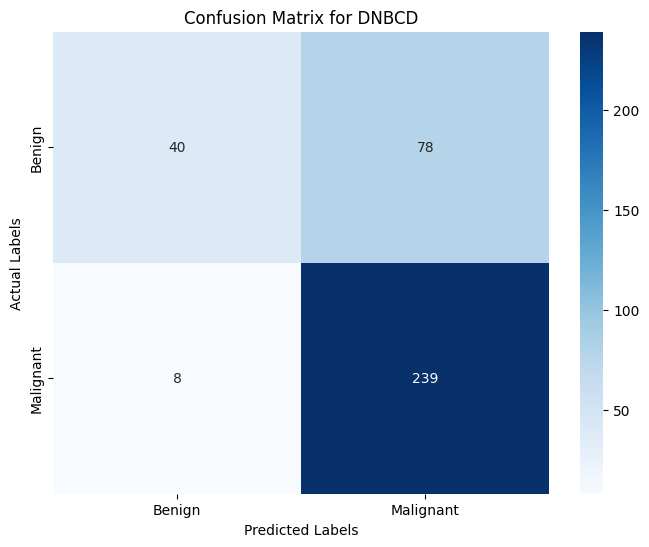

In [41]:
import os
import numpy as np
import cv2  # OpenCV for general use (not CLAHE)
import tensorflow as tf
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from sklearn.utils.class_weight import compute_class_weight

# Define paths
dataset_path = '/kaggle/input/breakhis-400x/Breakhis-400x'
base_dir = '/kaggle/working/split_data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Ensure clean split directories
for dir_path in [train_dir, val_dir, test_dir]:
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
    os.makedirs(dir_path)

# Split dataset into 70% train, 20% test, 10% validation
all_images = []
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]
    all_images.extend([(img, class_name) for img in images])

test_split = 0.2
val_split = 0.1
train_images, temp_images = train_test_split(
    all_images,
    test_size=(test_split + val_split),
    stratify=[label for _, label in all_images],
    random_state=42
)
val_images, test_images = train_test_split(
    temp_images,
    test_size=(test_split / (test_split + val_split)),
    stratify=[label for _, label in temp_images],
    random_state=42
)

# Copy files into respective directories without preprocessing
def copy_images(images, target_dir):
    for img_path, label in images:
        label_dir = os.path.join(target_dir, label)
        os.makedirs(label_dir, exist_ok=True)
        shutil.copy(img_path, label_dir)  # Copy the original image without preprocessing

copy_images(train_images, train_dir)
copy_images(val_images, val_dir)
copy_images(test_images, test_dir)

# Parameters
input_shape = (128, 128, 3)
batch_size = 32
epochs = 20

# Create data generators for binary classification
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=False
)

# Print the number of samples in each split
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")

evaluate_model(model_name,model, test_generator)

# Marge Two dataset

In [42]:
import os
import shutil

# Set the paths for the directories to merge
train_dir_1 = '/kaggle/working/split_100x_dataset/train'
train_dir_2 = '/kaggle/working/split_data/train'
val_dir_1 = '/kaggle/working/split_100x_dataset/validation'
val_dir_2 = '/kaggle/working/split_data/validation'
test_dir_1 = '/kaggle/working/split_100x_dataset/test'
test_dir_2 = '/kaggle/working/split_data/test'

# Create merged directories
merged_train_dir = '/kaggle/working/split_merged_set/merged_train'
merged_val_dir = '/kaggle/working/split_merged_set/merged_validation'
merged_test_dir = '/kaggle/working/split_merged_set/merged_test'

os.makedirs(merged_train_dir, exist_ok=True)
os.makedirs(merged_val_dir, exist_ok=True)
os.makedirs(merged_test_dir, exist_ok=True)

# Function to copy files from one directory to another
def copy_files(src_dir, dest_dir):
    for class_name in os.listdir(src_dir):
        src_class_dir = os.path.join(src_dir, class_name)
        dest_class_dir = os.path.join(dest_dir, class_name)
        
        # Create class directory in merged directory
        os.makedirs(dest_class_dir, exist_ok=True)

        # Copy files
        for file_name in os.listdir(src_class_dir):
            src_file_path = os.path.join(src_class_dir, file_name)
            dest_file_path = os.path.join(dest_class_dir, file_name)

            # Copy the file
            shutil.copy(src_file_path, dest_file_path)

# Copy files from both training directories to the merged directory
copy_files(train_dir_1, merged_train_dir)
copy_files(train_dir_2, merged_train_dir)

# Copy files from both validation directories to the merged directory
copy_files(val_dir_1, merged_val_dir)
copy_files(val_dir_2, merged_val_dir)

# Copy files from both test directories to the merged directory
copy_files(test_dir_1, merged_test_dir)
copy_files(test_dir_2, merged_test_dir)

print("Directories merged successfully.")

Directories merged successfully.


In [43]:
import os
import numpy as np
import cv2  # OpenCV for general use (not CLAHE)
import tensorflow as tf
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from sklearn.utils.class_weight import compute_class_weight

# Define paths
train_dir = "/kaggle/working/split_merged_set/merged_train"
val_dir = "/kaggle/working/split_merged_set/merged_validation"
test_dir = "/kaggle/working/split_merged_set/merged_test"

# Parameters
input_shape = (128, 128, 3)
batch_size = 32
epochs = 20

# Create data generators for binary classification
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=False
)

# Print the number of samples in each split
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")

# Compute class weights
train_labels = train_generator.classes  # Class indices for training samples
class_names = list(train_generator.class_indices.keys())
class_weights = compute_class_weight(
    class_weight='balanced',  # Balance classes based on their frequency
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights))

# Print the calculated class weights
print("Class Weights:", class_weights)

# Load pre-trained DenseNet121 model + higher-level layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the complete model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    class_weight=class_weights  # Use calculated class weights
)

# Unfreeze the base model for fine-tuning
base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])  # Reduce learning rate for fine-tuning

# Fine-tune the model with class weights
history_fine = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    class_weight=class_weights
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print('Loss:', loss)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Found 3295 images belonging to 2 classes.
Found 751 images belonging to 2 classes.
Found 1385 images belonging to 2 classes.
Training samples: 3295
Validation samples: 751
Test samples: 1385
Class Weights: {0: 1.5917874396135265, 1: 0.7289823008849557}
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/103 ━━━━━━━━━━━━━━━━━━━━ 86s 588ms/step - accuracy: 0.5615 - loss: 0.8184 - val_accuracy: 0.7936 - val_loss: 0.5672
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 392ms/step - accuracy: 0.6836 - loss: 0.6022 - val_accuracy: 0.8003 - val_loss: 0.5079
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 393ms/step - accuracy: 0.7493 - loss: 0.5217 - val_accuracy: 0.8415 - val_loss: 0.4319
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 392ms/step - accuracy: 0.7701 - loss: 0.4895 - val_accuracy: 0.8655 - val_loss: 0.3721
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 391ms/step - accuracy: 0.7781 - loss: 0.4908 - val_accuracy: 0.8602 - val_loss: 0.3866
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 390ms/step - accuracy: 0.8001 - loss: 0.4657 - val_accuracy: 0.8429 - val_loss: 0.4054
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 390ms/step - accuracy: 0.8193 - loss: 0.4154 - val_accuracy: 0.8695 - val_loss: 0.3604
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 405ms/step - accuracy: 0.8293 - loss: 0.4110 - val

I0000 00:00:1741501372.058156     119 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_513', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_512', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_50', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_43', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_438', 4 bytes spill stores, 4 bytes spill loads



103/103 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.7671 - loss: 0.5385 - val_accuracy: 0.6991 - val_loss: 1.4570
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 396ms/step - accuracy: 0.9015 - loss: 0.2404 - val_accuracy: 0.7683 - val_loss: 0.8206
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 399ms/step - accuracy: 0.9232 - loss: 0.1923 - val_accuracy: 0.8362 - val_loss: 0.5043
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 398ms/step - accuracy: 0.9351 - loss: 0.1482 - val_accuracy: 0.9374 - val_loss: 0.2313
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 401ms/step - accuracy: 0.9578 - loss: 0.1100 - val_accuracy: 0.9294 - val_loss: 0.2025
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 397ms/step - accuracy: 0.9570 - loss: 0.1104 - val_accuracy: 0.9561 - val_loss: 0.1486
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 398ms/step - accuracy: 0.9591 - loss: 0.1145 - val_accuracy: 0.9494 - val_loss: 0.1543
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 43s 398ms/step - accuracy: 0.9666 - loss: 0.0866 - val_a

# Marge Testing

44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 435ms/step
Model: DNBCD
Accuracy: 0.9690
Precision: 0.9978
Recall: 0.9566
F1 Score: 0.9767
Mean Absolute Error: 0.0310
Root Mean Square Error: 0.1762
AUC Score: 0.9972
Specificity: 0.9955



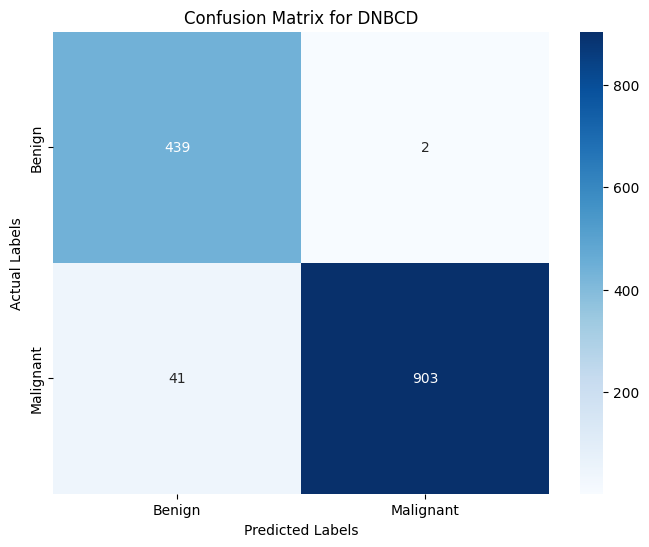

In [44]:
model_name= "DNBCD"
evaluate_model(model_name,model, test_generator)

In [45]:
model.save("New_Final_DNBCD_Model.h5")

# Test on B-400x

Found 1273 images belonging to 2 classes.
Found 182 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Training samples: 1273
Validation samples: 182
Test samples: 365
 3/12 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step
Model: DNBCD
Accuracy: 0.9452
Precision: 0.9913
Recall: 0.9271
F1 Score: 0.9582
Mean Absolute Error: 0.0548
Root Mean Square Error: 0.2341
AUC Score: 0.9873
Specificity: 0.9831



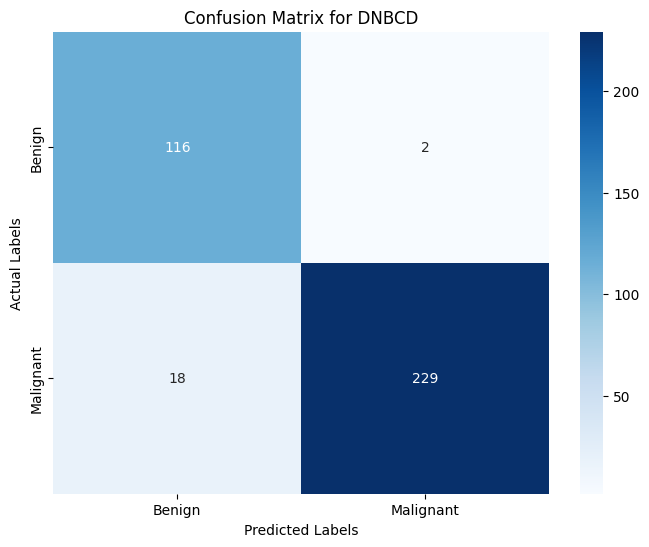

In [46]:
import os
import numpy as np
import cv2  # OpenCV for general use (not CLAHE)
import tensorflow as tf
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from sklearn.utils.class_weight import compute_class_weight

# Define paths
dataset_path = '/kaggle/input/breakhis-400x/Breakhis-400x'
base_dir = '/kaggle/working/split_data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Ensure clean split directories
for dir_path in [train_dir, val_dir, test_dir]:
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
    os.makedirs(dir_path)

# Split dataset into 70% train, 20% test, 10% validation
all_images = []
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]
    all_images.extend([(img, class_name) for img in images])

test_split = 0.2
val_split = 0.1
train_images, temp_images = train_test_split(
    all_images,
    test_size=(test_split + val_split),
    stratify=[label for _, label in all_images],
    random_state=42
)
val_images, test_images = train_test_split(
    temp_images,
    test_size=(test_split / (test_split + val_split)),
    stratify=[label for _, label in temp_images],
    random_state=42
)

# Copy files into respective directories without preprocessing
def copy_images(images, target_dir):
    for img_path, label in images:
        label_dir = os.path.join(target_dir, label)
        os.makedirs(label_dir, exist_ok=True)
        shutil.copy(img_path, label_dir)  # Copy the original image without preprocessing

copy_images(train_images, train_dir)
copy_images(val_images, val_dir)
copy_images(test_images, test_dir)

# Parameters
input_shape = (128, 128, 3)
batch_size = 32
epochs = 20

# Create data generators for binary classification
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=False
)

# Print the number of samples in each split
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")

evaluate_model(model_name,model, test_generator)

# Test on B-100x

Found 1902 images belonging to 2 classes.
Found 758 images belonging to 2 classes.
Found 391 images belonging to 2 classes.
Training samples: 1902
Validation samples: 758
Test samples: 391


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 577ms/step
Model: DNBCD
Accuracy: 0.9847
Precision: 1.0000
Recall: 0.9779
F1 Score: 0.9888
Mean Absolute Error: 0.0153
Root Mean Square Error: 0.1239
AUC Score: 1.0000
Specificity: 1.0000



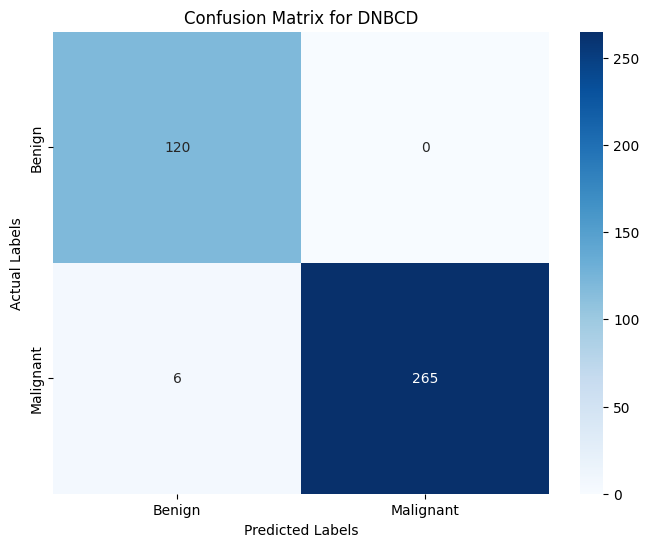

In [47]:
import os
import numpy as np
import cv2  # OpenCV for general use (not CLAHE)
import tensorflow as tf
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from sklearn.utils.class_weight import compute_class_weight

# Define paths
train_dir = "/kaggle/working/split_100x_dataset/train"
val_dir = "/kaggle/working/split_100x_dataset/test"
test_dir = "/kaggle/working/split_100x_dataset/validation"

# Parameters
input_shape = (128, 128, 3)
batch_size = 32
epochs = 20

# Create data generators for binary classification
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'  # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=False
)

# Print the number of samples in each split
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")

evaluate_model(model_name, model, test_generator)